In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


c:\Users\test\anaconda3\envs\bike\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Variabelm generieren wie 
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

#speichen als npz datei
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [4]:
#der datei laden
training_data = np.load('TF_intro.npz')

In [7]:
#deklrieren die Anzahl der Input Variabelm
input_size = 2
#deklrieren die Anzahl der Output Variabelm
output_size = 1

#Fuktionen, die angeben, wie das Modell angelegt wird
#es ist nur eine Beschreibung des Netzwerks, keine Berechnung beinhaltet
model = tf.keras.Sequential([ 
    #das berechnen die punktprodukt von Gewicht und Input, fügt das Bias hinzu und wendet auch die Aktivierungsfunktion an 
            tf.keras.layers.Dense(output_size,
                                #Anfangwert für Gewichte 
                                #kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                #Anfangwert für Bias 
                                #bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
])


#SGD = stochastic gradient descent optimizer 
#in benutzerdefinierter Optimiere können wir die Lernrate und verlust Fuktion defenieren
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


#compile ist der Platz, wo man optimizer und loss wählen
#loss = L2-Norm skaliert durch die Anzahl der Beobachtung
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
#loss = huber_loss eignet sich besonders für Datensätze mit Ausreißen

#Model tranieren, Angabe des Inputs und das Target
# epoch = wie viel Mal wir die Datei tranieren, der Standardwert ist 1, und normalerweise brauchen wir mehr als 1
# verbose = 0 schweigen, verbose = 1 animierter Fortschrittsbalken, verbose = 2 
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


Epoch 1/100
32/32 - 1s - 32ms/step - loss: 50.3148
Epoch 2/100
32/32 - 0s - 7ms/step - loss: 1.2028
Epoch 3/100
32/32 - 0s - 7ms/step - loss: 0.5099
Epoch 4/100
32/32 - 0s - 6ms/step - loss: 0.4046
Epoch 5/100
32/32 - 0s - 6ms/step - loss: 0.3563
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 0.4344
Epoch 7/100
32/32 - 0s - 5ms/step - loss: 0.3572
Epoch 8/100
32/32 - 0s - 9ms/step - loss: 0.3956
Epoch 9/100
32/32 - 0s - 6ms/step - loss: 0.3660
Epoch 10/100
32/32 - 0s - 8ms/step - loss: 0.3890
Epoch 11/100
32/32 - 0s - 4ms/step - loss: 0.3860
Epoch 12/100
32/32 - 0s - 7ms/step - loss: 0.3869
Epoch 13/100
32/32 - 0s - 6ms/step - loss: 0.4093
Epoch 14/100
32/32 - 0s - 7ms/step - loss: 0.4007
Epoch 15/100
32/32 - 0s - 6ms/step - loss: 0.4096
Epoch 16/100
32/32 - 0s - 6ms/step - loss: 0.3792
Epoch 17/100
32/32 - 0s - 9ms/step - loss: 0.3844
Epoch 18/100
32/32 - 0s - 4ms/step - loss: 0.4252
Epoch 19/100
32/32 - 0s - 5ms/step - loss: 0.4158
Epoch 20/100
32/32 - 0s - 5ms/step - loss: 0.3736
Epoch 2

In [ ]:
#die Gewichte und den Bias extrahieren
#das ist normalerweise unnotwendig, nur weil wir das Ergebnis checken möchten
model.layers[0].get_weights()

[array([[ 2.0356293],
        [-3.0103345]], dtype=float32),
 array([5.003321], dtype=float32)]

In [ ]:
#vorhersage der neuen Werte
#das ist normalerweise unnotwendig, nur weil wir diese Funktionalität erlernen

prediction = model.predict_on_batch(training_data['inputs'])

Text(0, 0.5, 'targets')

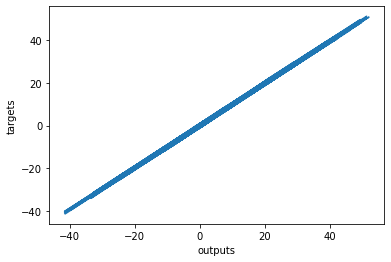

In [ ]:
#Vorhersage plotten
#np.squeeze ist notwendig für plot
plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')

in vergleichen zu Numpy, tensorflow zeigt schon die folgende Vorteile: 

1. die Definition für die Anfangswerten der Gewichte sind nicht notwendig.

    Tensorflow wählt die Anfangswerten durch Xavier Initialization um Linearität (aufgrud der Beschränkung auf eine kleine Bereich der Aktivierungsfunktion ) zu vermeiden, weil Nichtliniarität notwendig für Deeplearning ist.

    Parameter: Gewichte und Bias, Anfangswerten nicht notwendig
    Hyperparameter: Tiefe, Breite und Lernrate
    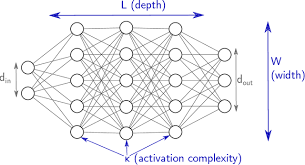

2. Es benutzt Stochastischen Gradientenabstieg statt Gradientenabstieg.Da SGD Näherung benutzen, wir verlieren ein bisschen Präzision.

    SGD aktualisiert die Gewichte bei jeder Batch statt jeder Epoche, deahalb erreichen das Ergebnnis schneller. Batching ermöglicht auch das parallele Tranieren von CPU/GPU, deswegen erhöht die Effizienz. Normale SGD aktualisiert nach jeder Eingabe. 

    SGD jeder Eingabe ist ein Batch, deshalb 4 Batch hier      
    Eingabe Datei

    [x11   x1k]

    [x21   x2k]

    [x31   x3k]

    [x41   x4k]

    (n * k) hier n = 4

    Mini bactching Gradientenabstieg ist wenn die Datei ins Batching Gruppen verteilt werden, aber es wird oft als SGD gennant.

    Mini bactching z.B. in 2 Gruppe teilen, deshalb 2 Batch hier
    Eingabe Datei

    [x11   x1k]   gruppe 1

    [x21   x2k]

    [x31   x3k]   gruppe 2

    [x41   x4k]

    (n * k) hier n = 4

    die Numpy Version ist batch GD; weil alles sind 1 Batch
    
    Eingabe Datei

    [x11   x1k]

    [x21   x2k]

    [x31   x3k]

    [x41   x4k]
    
    Batchsize ist auch ein hyperparameter.

    Hinweis: Batching ist für gewicht Aktualisierung deshalb nur für Daten die rückpropagation, Vorwärtsausbreitung gibt Vorhersagen(einfacher zu berechnen), deshalb nicht notwendig ist. 

3. Für GD lokale Minimum ist ein große Problem, mit Momentum in Tensorflow packet kann man diese Problem bewältigen, aber Momentum ist auch ein hyperparameter und muss man momentum Koeffizient wählen.
    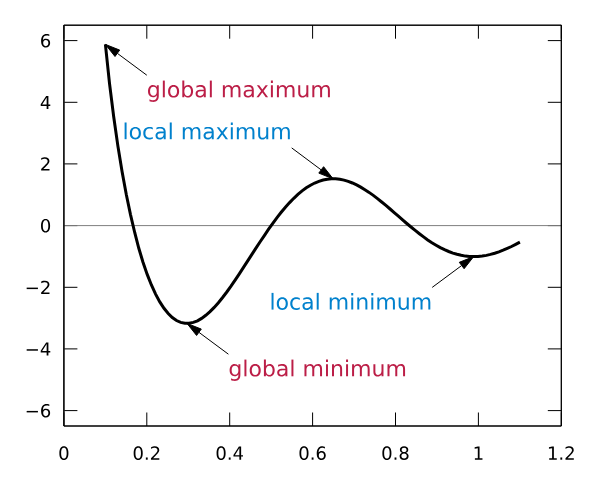

4. Es ist am besten wir fangen mit große Lernrate an und redziert später um schnellst das präziseste Minimum zu finden, und tensorflow bietet diese Möglichkeit 
    1. Adaptive Gradient Algorithm (Adagrad) vaiiert dynamisch die Lernrate bei jedem Update für jedes Gewicht einzeln, kann die Lernrate nach oben oder unten anpassen. Verschiedene Gewichte erreichen nicht gleichzeitig ihr Optimum
    
    2. Root mean square propagation (RMSprop)  es ist ähnlich wie Adagrad, aber kann die Lernrate nach oben oder unten anpassen, Adagrad kann nur eintönig 

    3. Adaptive moment estimation (Adam) Komnbination von Momentum und Lernratenplan (4.1 & 4.2)

